<a href="https://colab.research.google.com/github/soyudea/StrokePredictionModel/blob/main/04_modelo_con_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import math
from seaborn import distplot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score, mean_squared_error
from matplotlib.patches import split_path_inout
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot

from sklearn.model_selection import GridSearchCV

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.metrics import roc_auc_score

**1. Cargar Dataset**

Se carga el dataset final luego del preprocesamiento. Se cargan los archivos Dataset.csv y y.csv

In [11]:
X = pd.read_csv('Dataset.csv', sep=",") 
y = pd.read_csv('y.csv', sep=",") 

X=X.drop(columns=['Unnamed: 0'])
y=y.drop(columns=['Unnamed: 0'])


**2. Generador de muestras sintéticas**

In [12]:
pca=PCA(n_components=30) 
pca.fit(X) #
X_pca=pca.transform(X)

In [13]:
ros = RandomOverSampler(random_state=42, sampling_strategy=1.0)                          
Xres, yres = ros.fit_resample(X_pca, y)
Xtrain, Xtst, ytrain, ytst = train_test_split(Xres,yres, test_size=0.1) #Se toma el 90 % de los datos para Entrenar
print (Xtrain.shape, ytrain.shape, Xtst.shape, ytst.shape)
X=Xtrain
y=ytrain

(26409, 30) (26409, 1) (2935, 30) (2935, 1)


**3. Cálculo pesos de la clase Parámetro que se usa para minimizar el efecto del desbalance del dataset**

In [14]:
def dar_peso_clase():
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 17)
  Number_Muestras_por_Clase = ytrain.value_counts()
  Number_Muestras_por_Clase = Number_Muestras_por_Clase.sort_index(axis = 0, ascending = True)
  Numero_de_Clases = len(Number_Muestras_por_Clase.index)
  Peso_por_Clase = len(ytrain)/(Numero_de_Clases*Number_Muestras_por_Clase)
  return Peso_por_Clase

**4. Modelo de clasificación random Forest Entrenamiento con el 90 % de los datos**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [15]:
weight = dar_peso_clase() 
kf = KFokf = KFold(n_splits=10, random_state = True,shuffle=True)

X_test =0
Y_test =0

#warm_start mejoro la velocidad de ejecucion, mejoró la metrica
classifier = RandomForestClassifier(min_samples_split=10,
                                    ccp_alpha=0.000001,
                                    criterion='gini',
                                    class_weight = {0: weight[0], 1: weight[1]},
                                    random_state=True,max_features ="sqrt",
                                    warm_start=True,min_impurity_decrease=0.000005)

for train_index, test_index in kf.split(X):
    
    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    modelo = classifier.fit(Xtrain, ytrain)
    ypred = modelo.predict(Xtest)

    print()
    print(confusion_matrix(ytest, ypred))
    print(classification_report(ytest, ypred, digits =4, labels=[0,1]))
    s = roc_auc_score(ytest, modelo.predict(Xtest))
    print(f'Best val auc: {s: .4f}')

<ipython-input-15-4968c50d344a>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo = classifier.fit(Xtrain, ytrain)



[[ 960  348]
 [ 138 1195]]
              precision    recall  f1-score   support

           0     0.8743    0.7339    0.7980      1308
           1     0.7745    0.8965    0.8310      1333

    accuracy                         0.8160      2641
   macro avg     0.8244    0.8152    0.8145      2641
weighted avg     0.8239    0.8160    0.8147      2641

Best val auc:  0.8152



<ipython-input-15-4968c50d344a>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo = classifier.fit(Xtrain, ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
<ipython-input-15-4968c50d344a>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo = classifier.fit(Xtrain, ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


[[ 968  366]
 [ 131 1176]]
              precision    recall  f1-score   support

           0     0.8808    0.7256    0.7957      1334
           1     0.7626    0.8998    0.8256      1307

    accuracy                         0.8118      2641
   macro avg     0.8217    0.8127    0.8106      2641
weighted avg     0.8223    0.8118    0.8105      2641

Best val auc:  0.8127

[[ 961  350]
 [ 149 1181]]
              precision    recall  f1-score   support

           0     0.8658    0.7330    0.7939      1311
           1     0.7714    0.8880    0.8256      1330

    accuracy                         0.8111      2641
   macro avg     0.8186    0.8105    0.8097      2641
weighted avg     0.8182    0.8111    0.8099      2641

Best val auc:  0.8105

[[ 951  330]
 [ 126 1234]]
              precision    recall  f1-score   support

           0     0.8830    0.7424    0.8066      1281
           1     0.7890    0.9074    0.8440      1360

    accuracy                         0.8273      2641
 

<ipython-input-15-4968c50d344a>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo = classifier.fit(Xtrain, ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
<ipython-input-15-4968c50d344a>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo = classifier.fit(Xtrain, ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(



[[ 993  320]
 [ 133 1195]]
              precision    recall  f1-score   support

           0     0.8819    0.7563    0.8143      1313
           1     0.7888    0.8998    0.8407      1328

    accuracy                         0.8285      2641
   macro avg     0.8353    0.8281    0.8275      2641
weighted avg     0.8351    0.8285    0.8275      2641

Best val auc:  0.8281

[[ 988  390]
 [ 141 1122]]
              precision    recall  f1-score   support

           0     0.8751    0.7170    0.7882      1378
           1     0.7421    0.8884    0.8086      1263

    accuracy                         0.7989      2641
   macro avg     0.8086    0.8027    0.7984      2641
weighted avg     0.8115    0.7989    0.7980      2641



<ipython-input-15-4968c50d344a>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo = classifier.fit(Xtrain, ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
<ipython-input-15-4968c50d344a>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo = classifier.fit(Xtrain, ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Best val auc:  0.8027

[[ 964  371]
 [ 134 1172]]
              precision    recall  f1-score   support

           0     0.8780    0.7221    0.7924      1335
           1     0.7596    0.8974    0.8227      1306

    accuracy                         0.8088      2641
   macro avg     0.8188    0.8097    0.8076      2641
weighted avg     0.8194    0.8088    0.8074      2641

Best val auc:  0.8097


<ipython-input-15-4968c50d344a>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo = classifier.fit(Xtrain, ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
<ipython-input-15-4968c50d344a>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo = classifier.fit(Xtrain, ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(



[[ 948  380]
 [ 150 1163]]
              precision    recall  f1-score   support

           0     0.8634    0.7139    0.7815      1328
           1     0.7537    0.8858    0.8144      1313

    accuracy                         0.7993      2641
   macro avg     0.8086    0.7998    0.7980      2641
weighted avg     0.8089    0.7993    0.7979      2641

Best val auc:  0.7998

[[ 973  373]
 [ 117 1178]]
              precision    recall  f1-score   support

           0     0.8927    0.7229    0.7989      1346
           1     0.7595    0.9097    0.8278      1295

    accuracy                         0.8145      2641
   macro avg     0.8261    0.8163    0.8133      2641
weighted avg     0.8274    0.8145    0.8131      2641

Best val auc:  0.8163

[[ 926  362]
 [ 147 1205]]
              precision    recall  f1-score   support

           0     0.8630    0.7189    0.7844      1288
           1     0.7690    0.8913    0.8256      1352

    accuracy                         0.8072      2640


<ipython-input-15-4968c50d344a>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo = classifier.fit(Xtrain, ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


**5. Curva ROC: RandomForest**


Sin entrenar: ROC AUC=0.500
Algoritmo RandomForest: ROC AUC=0.805




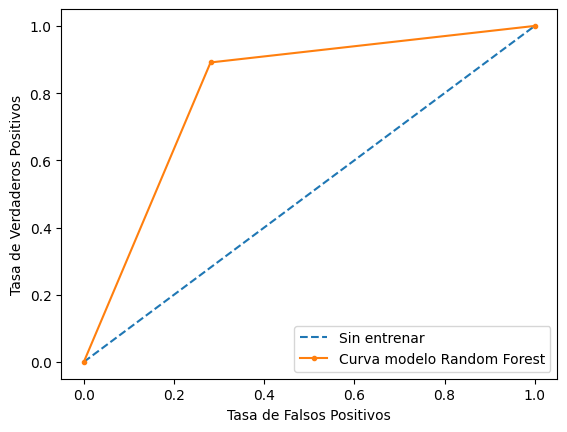

In [16]:
classes = classifier.predict(Xtest)
ns_probs = [0 for _ in range(len(ytest))]
ns_auc = roc_auc_score(ytest, ns_probs,average='weighted')
classifier_auc = roc_auc_score(ytest,classes,average='weighted')
#aps = average_precision_score(ytest, ns_probs)
print()
#print("Average_presicion_score "+str(aps))
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Algoritmo RandomForest: ROC AUC=%.3f' % (classifier_auc))
print()
classifier_probs = classes[:]
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
classifier_fpr,classifier_tpr, _ = roc_curve(ytest, classifier_probs)
print()
pyplot.plot(classifier_fpr,classifier_tpr, marker='.', label='Curva modelo Random Forest')
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()